# <strong>Chapter 4. Visualization with Matplotlib</strong>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import os
from matplotlib import cycler #Modificación de los valores estándar del aspecto de las gráficas.
from mpl_toolkits import mplot3d #Librería para gráficas 3D.

plt.style.use('seaborn-whitegrid')

##### <strong>Plotting from a script</strong>

Primero, en el caso en el que no se tiene un script del cual extraer información, es recomendable es uso de <strong>plt.show().</strong>

In [2]:
url = "https://www.indexmundi.com/map/?t=0&v=21&r=xx&l=en"
html = requests.get(url).content
Population = pd.read_html(html)[2]
Population.head()

,0,1,2
0,Country,Population,Year
1,China,1379302784,2017
2,India,1281935872,2017
3,United States,326625792,2017
4,Indonesia,260580736,2017


In [3]:
#Elimino la primera fila.
P = np.array(Population)
P = np.delete(P, (0), axis = 0)
P.shape

(198, 3)

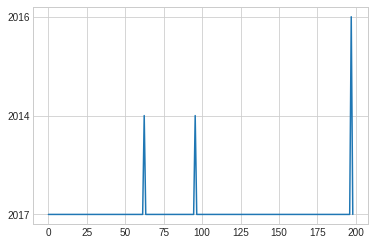

In [4]:
#Gráficas simples cuando no se hace uso de un script.
x = np.linspace(0, 198, 198)
plt.plot(x,P[:,2]) #Únicamente como ejemplo se grafican los años donde se tomó el registro.
plt.show()

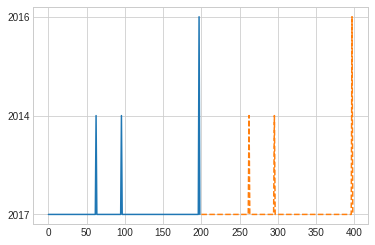

In [5]:
#Gráficas interactivas
%matplotlib inline
#No son imágenes estáticas.
fig = plt.figure()
plt.plot(x, P[:,2], '-')
plt.plot(x + 200, P[:,2], '--') #Formas en las que se diferencian las funciones, haciendo uso de patrones.
plt.show()

### <strong>Saving Figures to File</strong>

Para guardar las imágenes en algún formato, se hace uso del comando <i>fig.savefig('Nombre.formato')

In [6]:
fig.savefig('Ejemplo_1.jpg')

### <strong>Two Interfaces for the Price of One</strong>

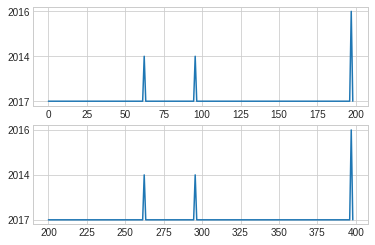

In [7]:
#Formas de producir más de una gráfica:

plt.figure() #Se produce una figura.
plt.subplot(2,1,1) #Dos filas, una columna, primera posición.
plt.plot(x,P[:,2])
plt.subplot(2,1,2) #Dos filas, una columna, segunda posición.
plt.plot(x + 200, P[:,2])
plt.show()

¿Qué pasa cuando se trata de más de dos gráficas?

Otra forma de tener control sobre el posicionamiento de los objetos es de la siguiente manera:

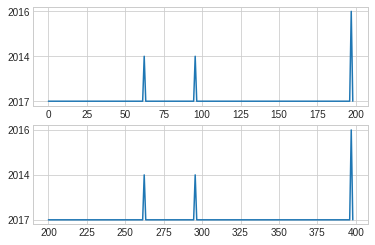

In [8]:
#Se trabaja de la misma forma que con un arreglo.
fig, ax = plt.subplots(2)
ax[0].plot(x, P[:,2]) 
ax[1].plot(x + 200, P[:,2])
plt.show()

### <strong>Simple Line Plots</strong>

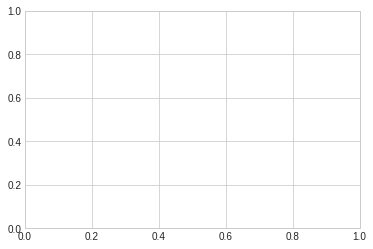

In [9]:
ax = plt.axes() #Plano cuidriculado.

### <strong>Adjusting the Plot: Line Colors and Styles</strong>

Uno de los puntos importantes es tener control sobre el <strong>color de línea, estilo</strong>. El color se especifica de distintas maneras, la más sencilla es por medio del nombre explícito del color, aunque en clave, permitiría acceder a una gamma más amplia de colores.

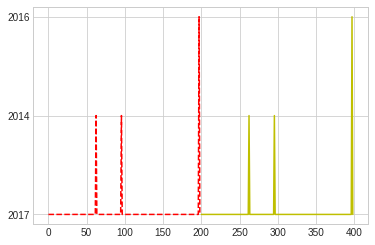

In [10]:
plt.plot(x, P[:,2], color = 'red', linestyle = 'dashed') #Nombre explícito del color, nombre explícito de la
                                                         #forma. 
plt.plot(x + 200, P[:,2], color = 'y', linestyle = '-') #Abreviación del nombre del color, abreviación del
                                                        #estilo de línea.
#Entre otras formas.
plt.show()

### <strong>Adjusting the Plot: Axes Limits</strong>

Para un control más fino del análisis gráfico, se puede establecer un rango en el cual se muestre la gráfica, existen dos formas de hacer lo siguiente:

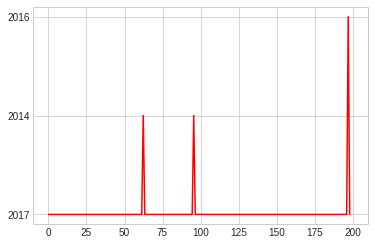

In [11]:
plt.plot(x, P[:,2], color = 'red')
plt.xlim(-10,210) #PAra poner límite en el y basta con cambiar a plt.ylim().
plt.show()

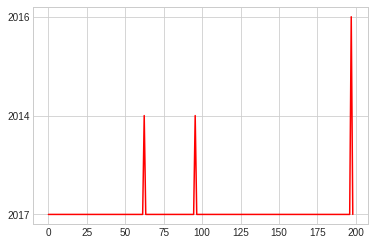

In [12]:
#Otra forma es con el comando plt.axis().
plt.plot(x, P[:,2], color = 'red')
plt.axis('tight') #Con este comando automáticamente se ubica en una escala observable en la gráfica.
#También existe 'equal' para garantizar una relación equivalente en el aspecto.
plt.show()

### <strong>Labeling Plots</strong>

Sección en la que se discuten los <strong>títulos, nombres de los ejes, leyendas.</strong>

A continuación se muestra un ejemplo sencillo:

<strong>1. Label.</strong> Lugar en donde se especifica la información de la etiqueta que identifica a la función.

<strong>2. plt.xlabel().</strong> ¿Cómo se desea hacer referencia a la función deseada?

<strong>3. plt.legend().</strong>Activa los labels, además se especifica la localización de las etiquetas.

<strong>4. plt.title().</strong>Título de la gráfica.

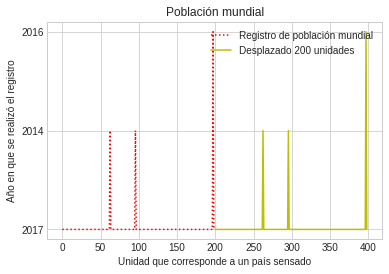

In [13]:
plt.plot(x, P[:,2], color = 'red', linestyle = ':', label = 'Registro de población mundial')
plt.plot(x + 200, P[:,2], color = 'y', label = 'Desplazado 200 unidades')
plt.xlabel('Unidad que corresponde a un país sensado')
plt.ylabel('Año en que se realizó el registro')
plt.legend(loc = 'upper right')
plt.title('Población mundial')
plt.show()

### <strong>Simple Scatter Plots</strong>

Scatter plots with plt.plot():

In [2]:
sunspots = np.loadtxt('sunspots.txt', unpack = True) #unpack = True cambia filas por columnas.
vsunspots = np.array(sunspots)

def concatenar(x, y): #x será el arreglo que une todos los datos, y de donde se tomarán los datos.
    for i in range(5):
        x = np.concatenate((x, vsunspots[i * 2]), axis = None)
        y = np.concatenate((y, vsunspots[(i * 2) + 1]), axis = None)
    return x, y

x1 = np.array([])
y1 = np.array([])
x1, y1 = concatenar(x1,y1)

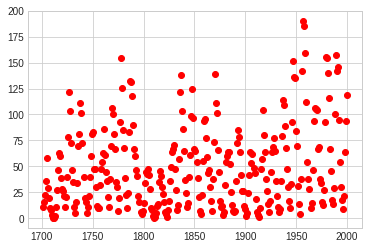

In [4]:
plt.plot(x1, y1, 'o', color = 'red') #Existen más símbolos disponibles.
plt.show()

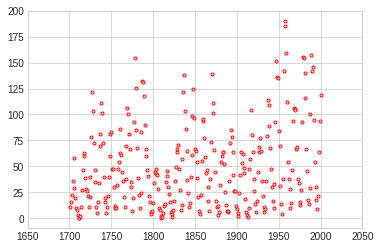

In [16]:
#Una manera más:
plt.plot(x1, y1, 'o', color = 'red', markersize = 3, linewidth = 4, markerfacecolor = 'w', markeredgewidth = 1) #Existen más símbolos disponibles.
#Donde markersize es el tamaño del ícono, el color del área se determina con markerfacecolor, en general los
#comandos se diferencian con color, size, width, y con área, borde.
plt.xlim(1650,2050)
plt.show()

##### <strong>Scatter Plots with plt.scatter</strong>

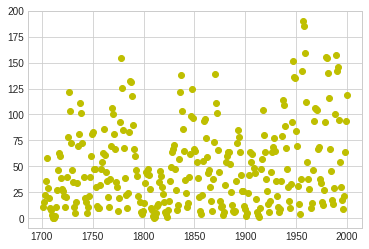

In [17]:
#Basta con definir la forma del objeto:
plt.scatter(x1, y1, marker = 'o', color = 'y')
plt.show()

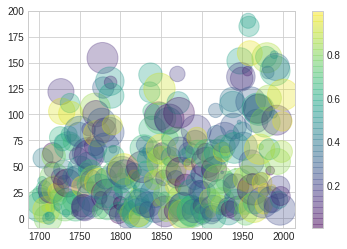

In [18]:
rng = np.random.RandomState(0)
colors = rng.rand(300) #El número coincide con el tamaño del arreglo x1, y1.
sizes = rng.rand(300) * 1000
plt.scatter(x1, y1, c=colors, s=sizes, alpha=0.3,cmap='viridis') #Además se agrega escala de colores.
plt.colorbar()  #Con este comando se muestra escala de colores.
plt.show()

Existe una librería con la cual se puede realizar el mismo trabajo; <i>from sklearn.datasets, import load_iris.</i>

El método más eficiente de entre los dos mostrados es <strong>plt.plot()</strong> dado que <strong>plt.scatter()</strong> como se mostró añade color y forma para cada elemento indivual, es decir, realiza el mismo procedimiento repetidas ocasiones.

### <strong>Visualizing Errors</strong>

<i><strong>Pregunta principal:</strong> ¿Cuándo las mediciones son consistentes con las predicciones?</i>

#### <strong>Basic Errorbars</strong>

<ErrorbarContainer object of 3 artists>

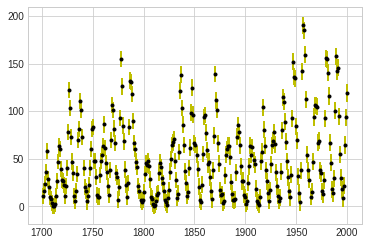

In [19]:
dy = 0.1 + 0.2 * np.sqrt(x1) #Se exagera únicamente para ser visible a la vista humana.
#plt.errorbar(x1, y1, yerr = dy, fmt = '.', color = 'k') #Primera forma de presentar los datos.
plt.errorbar(x1, y1, yerr = dy, fmt = '.k', ecolor = 'y', elinewidth = 2, capsize = 0) #Segunda forma de 
#presentar los datos, proporcionando atributos a la forma y a la línea.

#### <strong>Continuous Errors</strong>

En ocasiones es conveniente presentar el error de manera continua, la motivación es determinar una región de consistencia en los datos presentados, la función que produce el resultado siguinte es <strong><i>plt.fill_between()</i></strong>.

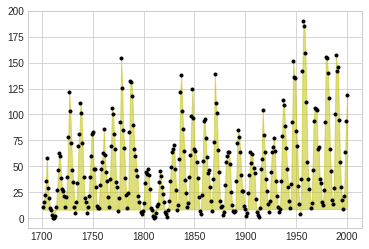

In [20]:
dy = 0.1 + 0.2 * np.sqrt(x1)
plt.plot(x1, y1, '.k')
plt.fill_between(x1, y1, dy, color = 'y', alpha = 0.5)

In [3]:
v1 = pd.read_csv('201901010000Lluv.csv', encoding = "ISO-8859-1", engine='python')
v = np.array(v1)
v1.head()

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",6.61
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",10.60
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",10.50
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70


### <strong>Density and Contour Plots</strong>

#### <strong>Visualizing a Three-Dimensional Function</strong>

La forma más sencilla de preparar nuestro conjunto de datos es haciendo uso de la función <strong>np.meshgrid()</strong> la cual contruye cuadrículas bidimensionales a partir de arreglos de una dimensión.

Posteriormente, se hace uso de <strong>plt.contour(), plt.contourf(),</strong> adicionalmente se incluirá la línea <strong>plt.colorbar()</strong> cuya presencia únicamente proporciona más información acerca de los datos, observe la diferencia entre las funciones que dibujan contornos:

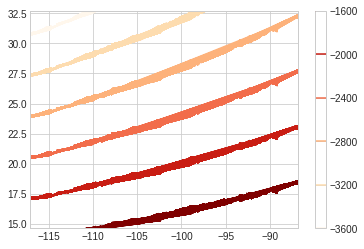

In [4]:
X, Y = np.meshgrid(v[:,0], v[:,1])
def aux(x,y):
    return x * y + 10 * np.random.randn(1241)
Z = aux(X, Y)
plt.contour(X, Y, Z, cmap = 'OrRd')
plt.colorbar()

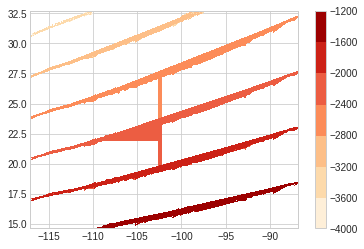

In [23]:
plt.contourf(X, Y, Z, cmap = 'OrRd')
plt.colorbar()
#Las tonalidades oscuras representan los picos, mientras que las claras los valles.

TypeError: Image data cannot be converted to float

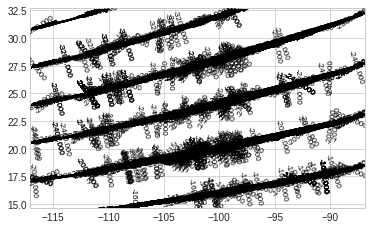

In [6]:
contours = plt.contour(X, Y, Z, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy', alpha=0.3)
plt.colorbar();

Como puede observarse, hay un problema puesto que el número de puntos que tienen que convertirse a float es demasiado grande en un contorno que no tiene suficiente volumen para abarcar todas las letras.

### <strong>Histograms, Binnings, and Density</strong>

Nuevamente trabajando con el vector <i>vsunspots,</i> se producirá un histograma:

In [4]:
suma = np.zeros(6)
i = 0
k = 0
while i < 6:
    k = 50 * i
    for j in range(50):
        suma[i] += y1[k]
        k += 1
    i += 1
suma

array([1949.3, 2629.5, 2052. , 2198.5, 2472.7, 3691.7])

Text(0.5,1,'Manchas solares en rangos de 50 años')

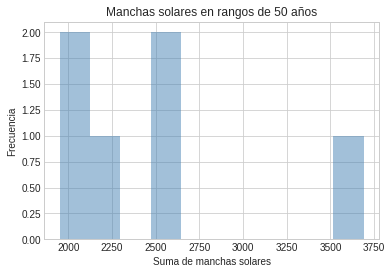

In [93]:
plt.hist(suma, color='steelblue', alpha = 0.5)
plt.xlabel('Suma de manchas solares')
plt.ylabel('Frecuencia')
plt.title('Manchas solares en rangos de 50 años')

Text(0.5,1,'Manchas solares en rangos de 50, 25 años')

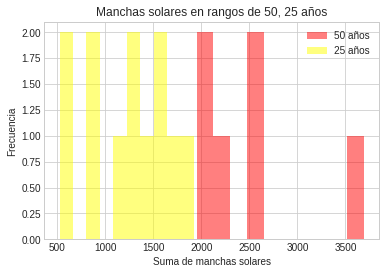

In [5]:
#Una forma de introducir más de dos tipos de datos en na misma gráfica:
suma_1 = np.zeros(12)
i = 0
k = 0
while i < 12:
    k = 25 * i
    for j in range(25):
        suma_1[i] += y1[k]
        k += 1
    i += 1

plt.hist(suma, color = 'red', alpha = 0.5, label = '50 años')
plt.hist(suma_1, color = 'yellow', alpha = 0.5, label = '25 años')
plt.legend()
plt.xlabel('Suma de manchas solares')
plt.ylabel('Frecuencia')
plt.title('Manchas solares en rangos de 50, 25 años')

### <strong>Two-Dimensional Histograms and Binnings</strong>

Un histograma 2D requiere de dos entradas, donde se puede observar, para este caso en que temporada ocurrieron las manchas solares y con qué frecuencia.

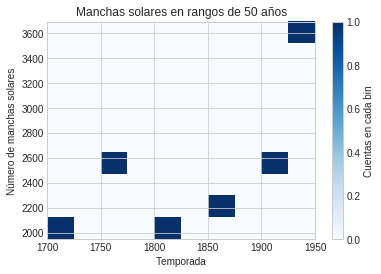

In [48]:
tiempo = [1700, 1750, 1800, 1850, 1900, 1950]
plt.hist2d(tiempo, suma, cmap = 'Blues')
cb = plt.colorbar()
cb.set_label('Cuentas en cada bin')
plt.xlabel('Temporada')
plt.ylabel('Número de manchas solares')
plt.title('Manchas solares en rangos de 50 años')
plt.show()

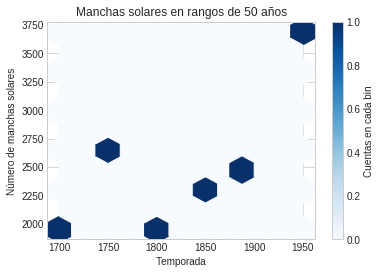

In [54]:
#Para que las figuras sean hexágonos en lugar de cuadrados:
plt.hexbin(tiempo, suma, gridsize = 10, cmap = 'Blues')
cb = plt.colorbar()
cb.set_label('Cuentas en cada bin')
plt.xlabel('Temporada')
plt.ylabel('Número de manchas solares')
plt.title('Manchas solares en rangos de 50 años')
plt.show()

Otra forma de evaluar densidades es con <strong> kernel density  estimation  (KDE).</strong>

### <strong>Customizing Plot Legends</strong>

La finalidad de esta subsección es aprender a realizar legendas más elaboradas y estéticas.

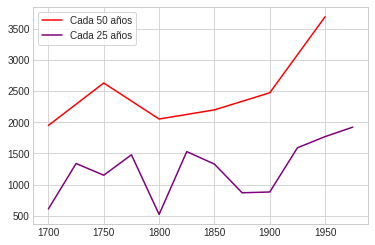

In [73]:
#Trabajando con el ejemplo de las manchas solares:
tiempo_1 = [1700, 1725, 1750, 1775, 1800, 1825, 1850, 1875, 1900, 1925, 1950, 1975]
plt.plot(tiempo, suma, color = 'red', label = 'Cada 50 años')
plt.plot(tiempo_1, suma_1, color = 'purple', label = 'Cada 25 años')
plt.legend(frameon = True)

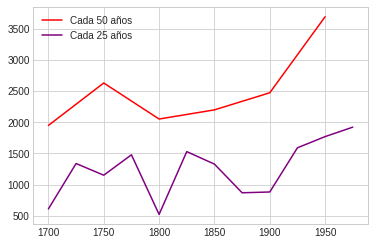

In [72]:
#Para eliminar el recuadro:
plt.plot(tiempo, suma, color = 'red', label = 'Cada 50 años')
plt.plot(tiempo_1, suma_1, color = 'purple', label = 'Cada 25 años')
plt.legend(frameon = False)

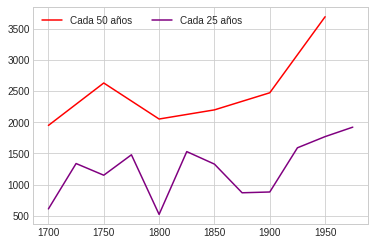

In [74]:
#Para especificar el número de columnas en la legenda:
plt.plot(tiempo, suma, color = 'red', label = 'Cada 50 años')
plt.plot(tiempo_1, suma_1, color = 'purple', label = 'Cada 25 años')
plt.legend(frameon = False, ncol = 2)

Es posible utilizar una caja redonda <i>(fancybox = True)</i>, agregar sombra <i>(shadow = True)</i>, cambiar la transparencia <i>(alpha = número)</i> o cambiar el borde de la figura <i>(boderpad = número)</i>.

### <strong>Choosing Elements for the Legend</strong>

Automáticamente se incluyen en el cuadro de leyenda los elementos que se grafican independientemente en la misma figura, esto puede cambiar si se especifica cuáles de estos elementos gustaría graficarse.

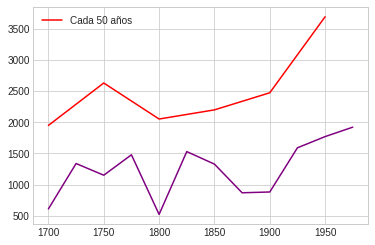

In [76]:
#Note que automáticamente se ignoran los elementos que no tienen explícitamente el comando 'label =' en
#plt.plot().
plt.plot(tiempo, suma, color = 'red', label = 'Cada 50 años')
plt.plot(tiempo_1, suma_1, color = 'purple')
plt.legend()

#### <strong>Legend for Size of Points</strong>

Se establece el tamaño de los puntos estableciendo un rango en el algoritmo.

In [81]:
v1.head()

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",6.61
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",10.60
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",10.50
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70


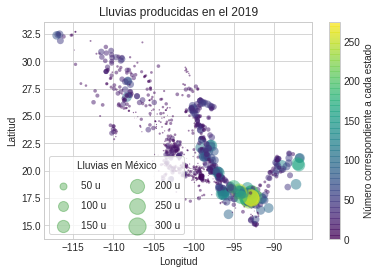

In [139]:
#Se introduce el valor de la longitud, latitud y las lluvias en cada estado, se realiza una escala en
#frecuencia.
plt.scatter(np.array(v[:,0], dtype=np.float64), np.array(v[:,1], dtype=np.float64), label=None, c = np.array(v[:,5], dtype=np.float64), cmap='viridis', s = np.array(v[:,5], dtype=np.float64), linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Número correspondiente a cada estado');
plt.title('Lluvias producidas en el 2019')

Ll = np.array(v[:,5], dtype=np.float64)
#Para las etiquetas:
for Ll in [50, 100, 150, 200, 250, 300]:
    plt.scatter([], [], c = 'green', alpha=0.3, s = Ll, label=str(Ll) + ' u')
    plt.legend(scatterpoints=1, frameon=True,labelspacing=1, ncol = 2, title='Lluvias en México', loc = 'lower left')

### <strong>Multiple Legends</strong>

Para establecer más de una leyenda en una figura se realiza el siguiente procedimiento (es una opción):

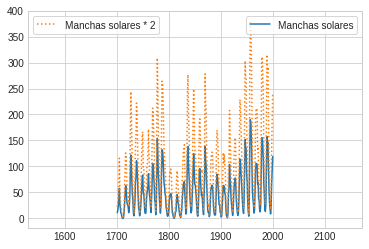

In [152]:
fig, ax = plt.subplots()
figuras = []
estilos = ['-', ':']

for i in range(2):
    figuras += ax.plot(x1, y1 * (i + 1), estilos[i])
ax.axis('equal')

#Para la primer leyenda:
ax.legend(figuras[:1], ['Manchas solares'], loc='upper right', frameon = True)
from matplotlib.legend import Legend
leg = Legend(ax, figuras[1:], ['Manchas solares * 2'], loc = 'upper left', frameon = True)
ax.add_artist(leg);

### <strong>Customizing Colorbars</strong>

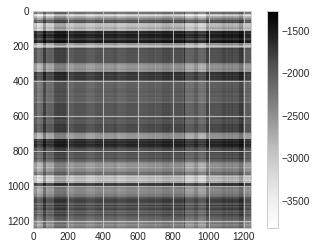

In [14]:
X_, Y_ = np.meshgrid(v[:,0], v[:,1])
def aux(x,y):
    return x * y + np.random.randn(1241)
Z_ = aux(X, Y)
usada = np.array(Z_, dtype=np.float64)
plt.imshow(usada)
plt.colorbar()

#### <strong>Customizing Colorbars</strong>

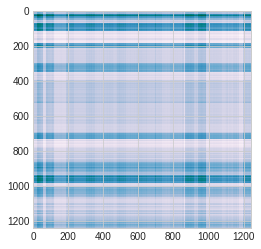

In [9]:
plt.imshow(usada, cmap = 'PuBuGn_r')

El propósito de esta sección es mostrarnos las distintas combinaciones de los colores para su uso en las figuras. A continuación se muestra un ejemplo de como se puede cambiar la gamma y la atenuación para mostrar la misma información:

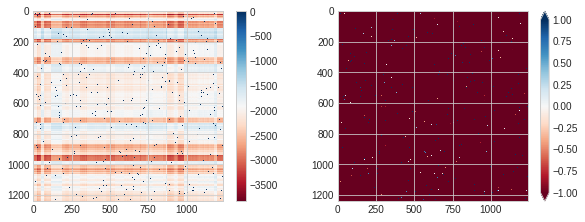

In [17]:
#El propósito de estas líneas de código es hacer dos figuras haciendo uso del comando plt.subplot(), y modi-
#ficar la densidad en color de la gráfica es por medio de plt.colorbar(), en la que cambia la distribución
#de colores.
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(usada, cmap='RdBu')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(usada, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

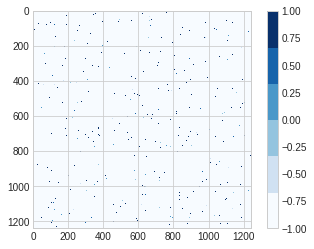

In [21]:
#Para realizar la imagen con tonos discretos:
plt.imshow(usada, cmap=plt.cm.get_cmap('Blues', 6)) #Mapa de seis tonalidades.
plt.colorbar()
plt.clim(-1, 1)

### <strong>Multiple Subplots<strong>

En ocasiones es importante comparar información de dos o más conjuntos de datos, para eso, regularmente se hace uso de objetos estándar que comparten espacio.

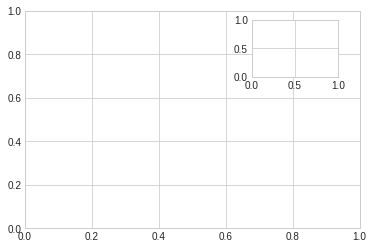

In [22]:
ax1 = plt.axes()  #Tamaño y espacio estándar.
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #Especificación de un objeto.

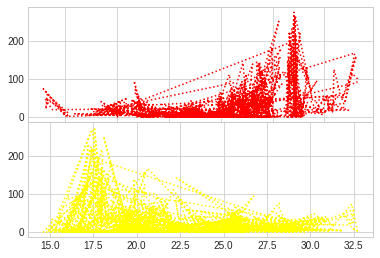

In [30]:
#Un ejemplo:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
ax1.plot(v[:,0], v[:,5], linestyle = ':', color = 'red')
ax2.plot(v[:,1], v[:,5], linestyle = ':', color = 'yellow')
#Las anteriores son gráficas de lluvias como función de la longitud y como función de la latitud respectivamente.
#¿Cómo se agregan las etiquetas en ejes, en cuadro de texto, etc?

#### <strong>plt.subplot: Simple Grids of Subplots</strong>

Para establecer las dimensiones y número de objetos se realiza el siguiente procedimiento:

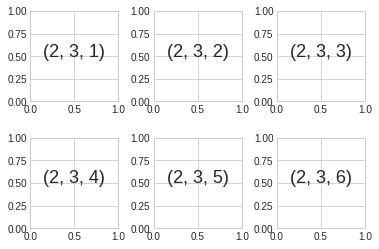

In [31]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) #Espacio entre cada uno de los objetos que componen la figura.
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) #Posición de la figura i.
    ax.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center') #Se agrega texto en la posición del objeto.

#### <strong>plt.subplots: The Whole Grid in One Go</strong>

Una forma más sencilla de producir más objetos en una figura es haciendo uso de arreglos bidimensionales.

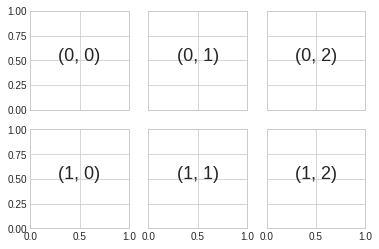

In [32]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')

#### <strong>plt.GridSpec: More Complicated Arrangements</strong>

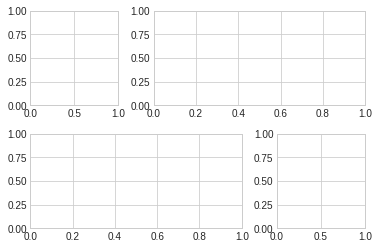

In [34]:
#Para añadir objetos que no possen el mismo tamaño:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3) #Espacio entre objetos y dimensiones.
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:]) #Abarca el tamaño de dos objetos.
plt.subplot(grid[1, :2]) #Abarca el tamaño de dos objetos.
plt.subplot(grid[1, 2])

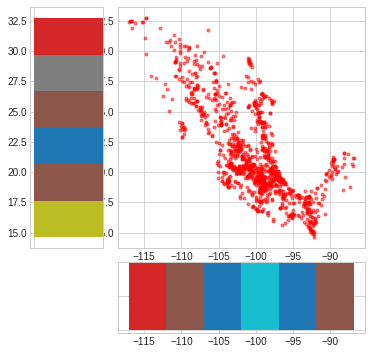

In [46]:
#*****Ejercicio del libro*****
fig = plt.figure(figsize=(6, 6)) #Figura con dimensión establecida.
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
g = fig.add_subplot(grid[:-1, 1:]) #Gráfica principal.
y_h = fig.add_subplot(grid[:-1, 0], xticklabels = [], sharey = g) #Se comparten ejes con la gráfica principal.
x_h = fig.add_subplot(grid[-1, 1:], yticklabels = [], sharex = g)

g.plot(v[:,0], v[:,1], 'ok', markersize = 3, alpha = 0.5, color = 'red') #Se grafica la principal.
x_h.hist(v[:,0], 6, histtype='stepfilled',orientation='vertical') #Se grafican las demás en forma de histograma.
x_h.invert_yaxis()
y_h.hist(v[:,1], 6, histtype='stepfilled',orientation='horizontal') #Se grafican las demás en forma de histograma.
y_h.invert_xaxis()

#Puede observarse que la frecuencia es la misma en los datos.

### <strong>Text and Annotation</strong>

Text(0.2,0.2,'. Figure: (0.2, 0.2)')

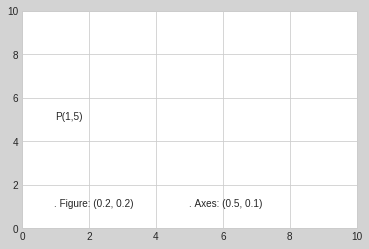

In [62]:
#Agregar etiquetas en algún punto en la tabla:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10]) #Muestra del tamaño de los ejes.
ax.text(1, 5, "P(1,5)", transform=ax.transData) #Un punto en el espacio.
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

#### <strong>Arrows and Annotation</strong>

[Text(0,0.5,'Número de manchas solares'),
 Text(0.5,0,'Año'),
 Text(0.5,1,'Manchas solares por año')]

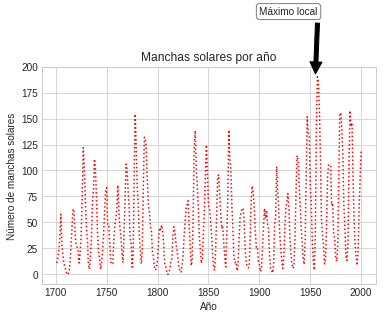

In [79]:
#Función plt.arrow().
fig, ax = plt.subplots()
ax.plot(x1, y1, linestyle = ':', color = 'red')
ax.annotate('Máximo local', xy=(1955, 190), xytext=(1900, 250),
            arrowprops=dict(facecolor='black', shrink=0.05), 
            bbox=dict(boxstyle="round", fc="none", ec="gray")) #Etiqueta.
ax.set(title='Manchas solares por año', ylabel='Número de manchas solares', xlabel = 'Año')

### <strong>Customizing Ticks</strong>

En esta ubicación hay varios ejemplos para ajustar la localización de las marcas, etiquetas y de formatos particulares en los que se esté interesado.

#### <strong>Hiding Ticks or Labels</strong>

Para eliminar todo tipo de etiquetas se usan los comandos <i>plt.NullLocator()</i> y <i>plt.NullFormatter(),</i>

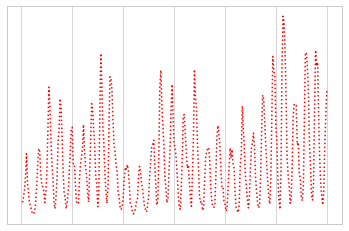

In [88]:
ax = plt.axes()
ax.plot(x1, y1, linestyle = ':', color = 'red')
ax.yaxis.set_major_locator(plt.NullLocator()) #Las funciones son equivalentes.
ax.xaxis.set_major_formatter(plt.NullFormatter())

### <strong>Reducing or Increasing the Number of Ticks</strong>

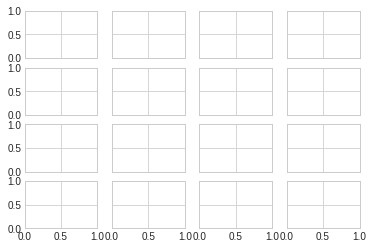

In [90]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True) #División de gráficas, el número de gráficas equivale
                                                       #a los números introducidos en la entrada.

Es posible establecer el número de divisiones en los ejes para cada una de las gráficas se hace uso del comando <i>plt.MaxNLocator(N)</i> donde <strong>N</strong> es el número de divisiones.

### <strong>Fancy Tick Formats</strong>

Para el formato personalizado es necesario agregar un simple algoritmo haciendo referencia a cada uno <i>plt.FuncFormatter(formato de división)</i>.

## <strong>Customizing Matplotlib: Configurations and Stylesheets</strong>

### <strong>Plot Customization by Hand</strong>

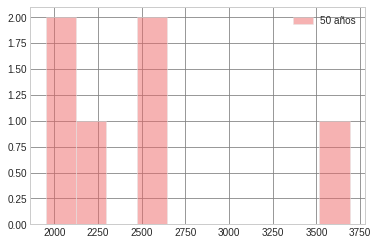

In [113]:
ax = plt.axes() #Para poner un color en el fondo (gris).
ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='solid') #Se personalizan las líneas que dividen el eje.
ax.hist(suma, edgecolor='#E6E6E6', color='#EE6666', alpha = 0.5, label = '50 años')
#plt.hist(suma_1, color = 'yellow', edgecolor='#E6E6E6', alpha = 0.5, label = '25 años')
ax.legend()

### <strong>Changing the Defaults: rcParams</strong>

La configuración <strong>plt.rc</strong> contiene por default los detalles de todas las gráficas posteriores que se realicen, estos parámetros son modificables.

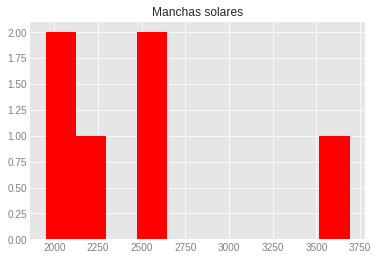

In [26]:
IPython_default = plt.rcParams.copy() #Copia de estilo default.
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',axisbelow = True, grid = True)
plt.rc('grid', color='w', linestyle = 'solid') #Bordes color blanco, líneas sólidas.
plt.rc('xtick', direction = 'out', color = 'gray') #Etiquetas en eje x naranjas.
plt.rc('ytick', direction = 'out', color = 'gray') #Etiquetas en eje y naranjas.
plt.rc('patch', edgecolor = 'orange') #
plt.rc('lines', linewidth = 2)

plt.hist(suma, color = 'red')
plt.title('Manchas solares')
plt.xlabel = ('Suma de manchas solares')
plt.ylabel = ('Frecuencia')

#Es posible determinar los colores prederterminados con el comando 'prop_cycle' en plt.rc('grid').

#### <strong>Stylesheets</strong>

In [28]:
#La lista de los nombres de los temas se puede observar mediante el siguiente comando:
plt.style.available[:5]

['grayscale',
 '_classic_test',
 'seaborn',
 'tableau-colorblind10',
 'seaborn-poster']

Forma de uso de los temas:
<ul style="list-style-type:square;">
    <li><strong>Permanente,</strong></li> con el comando <i>plt.style.use('stylename').</i>
  <li><strong>Temporal,</strong></li> con el comando <i>with plt.style.context('stylename'):
    make_a_plot().</i>
</ul> 

Se hará uso de todos los temas de manera temporal probando la siguiente función:

In [30]:
def HyL():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(suma, color = 'red', bins = 20, 
               density = True) #Se grafica la suma de manchas solares, se normaliza con density = True.
    for i in range(3):
        ax[1].plot(np.random.rand(10)) #Función random, únicamente para visualizar los colores predefinidos.
    ax[1].legend(['Línea a', 'Línea b', 'Línea c'], loc='lower left')

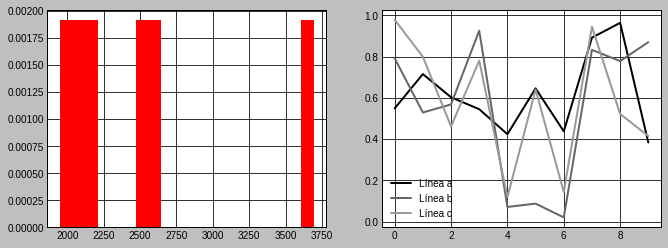

In [31]:
#----------grayscale----------
with plt.style.context('grayscale'):
    HyL()

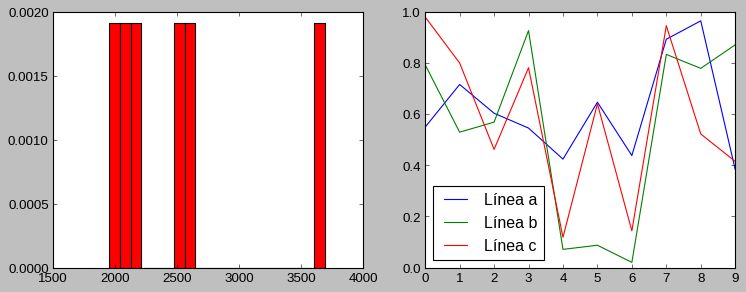

In [32]:
#----------_classic_test----------
with plt.style.context('_classic_test'):
    HyL()

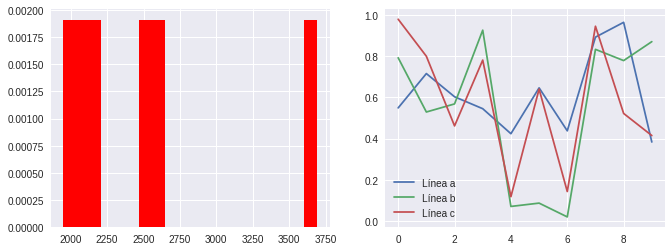

In [33]:
#----------seaborn----------
with plt.style.context('seaborn'):
    HyL()

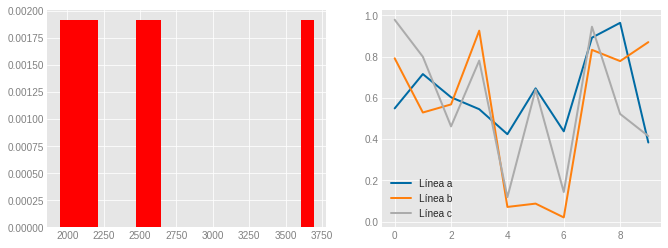

In [34]:
#----------tableau-colorblind10----------
with plt.style.context('tableau-colorblind10'):
    HyL()

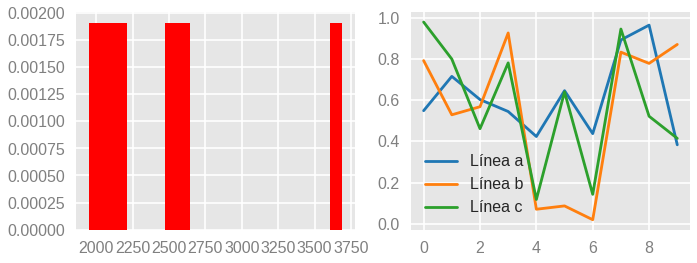

In [35]:
#----------seaborn-poster----------
with plt.style.context('seaborn-poster'):
    HyL()

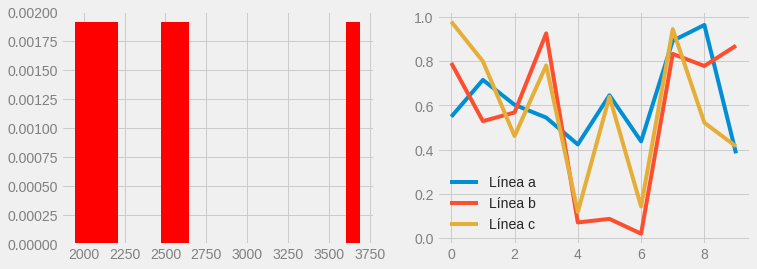

In [36]:
#----------fivethirtyeight----------
with plt.style.context('fivethirtyeight'):
    HyL()

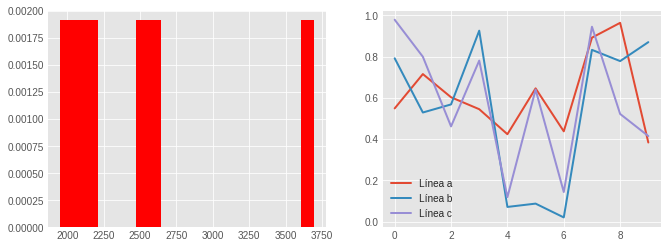

In [37]:
#----------ggplot----------
with plt.style.context('ggplot'):
    HyL()

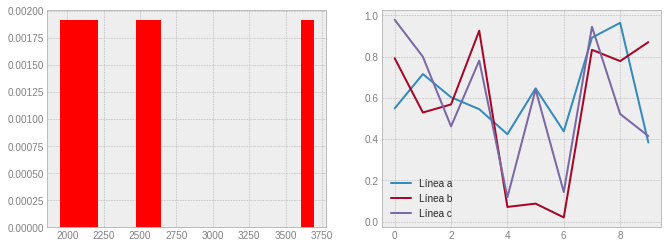

In [38]:
#----------bmh----------
with plt.style.context('bmh'):
    HyL()

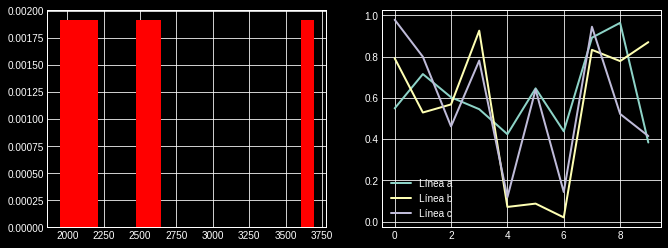

In [39]:
#----------dark_background----------
with plt.style.context('dark_background'):
    HyL()

### <strong>Three-Dimensional Plotting in Matplotlib</strong>

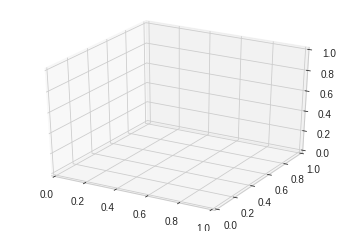

In [42]:
#Iniciando con:
fig = plt.figure()
ax = plt.axes(projection='3d')

#### <strong>Three-Dimensional Points and Lines</strong>

Text(0.5,0,'Precipitación')

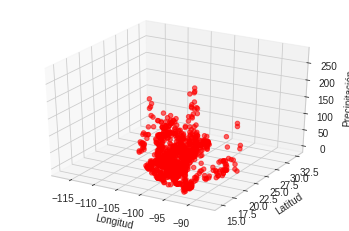

In [62]:
mapa = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(v[:,0], v[:,1], v[:,5], '.', color = 'red', alpha = 0.6); #Se grafican puntos.
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Precipitación')

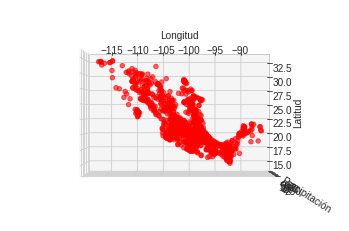

In [74]:
#Para mover la perspectiva:
ax.view_init(elev=90., azim=270) #Se mueve a vista aérea.
mapa

#### <strong>Three-Dimensional Contour Plots</strong>

Text(0.5,0,'$x^{2} - y^{2}$')

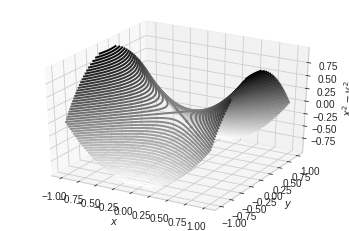

In [84]:
#Otra forma de graficar es haciendo uso de contornos.
def SdM(x, y):
    return x ** 2 - y ** 2

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = SdM(X, Y)
Silla = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$x^{2} - y^{2}$')

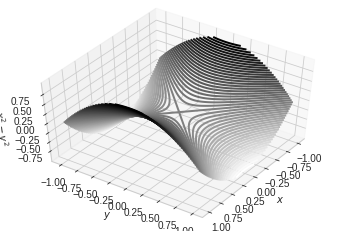

In [85]:
ax.view_init(50, 35)
Silla

#### <strong>Wireframes and Surface Plots</strong>

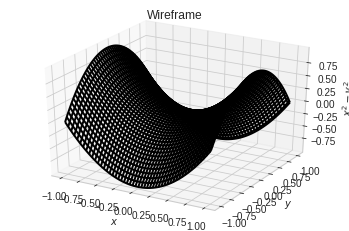

In [88]:
#----------Ejemplo de Wireframe---------
Silla_1 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('Wireframe')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$x^{2} - y^{2}$');

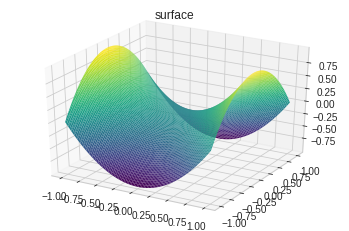

In [89]:
#----------Ejemplo de Surface---------
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');

#### <strong>Surface Triangulations</strong>

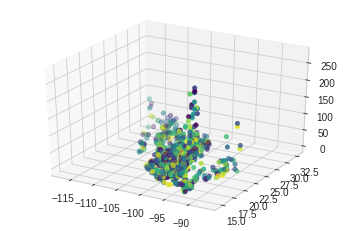

In [101]:
#-----------Ejemplo de Scatter---------
rng = np.random.RandomState(0)
colors = rng.rand(1241)
ax = plt.axes(projection='3d')
ax.scatter(v[:,0], v[:,1], v[:,5], c = colors, cmap = 'viridis', linewidth = 0.5);

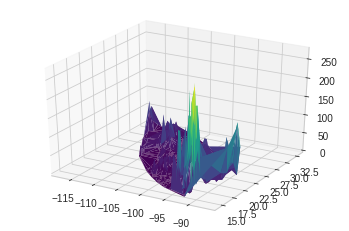

In [105]:
#----------ejemplo de tri_surf----------
mapa_1 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(np.array(v[:,0], dtype=np.float64), np.array(v[:,1], dtype=np.float64), np.array(v[:,5], dtype=np.float64), cmap = 'viridis', edgecolor = 'none');

### <strong>Visualization with Seaborn</strong>

#### <strong>Histograms, KDE, and densities</strong>

In [6]:
import seaborn as sns

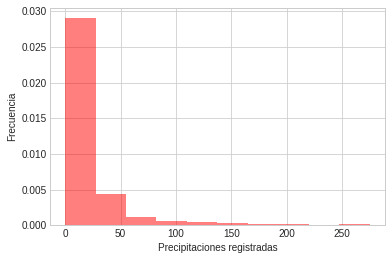

In [29]:
plt.hist(np.array(v[:,5], dtype=np.float64), density = True, alpha = 0.5, color = 'red')
plt.xlabel('Precipitaciones registradas')
plt.ylabel('Frecuencia');

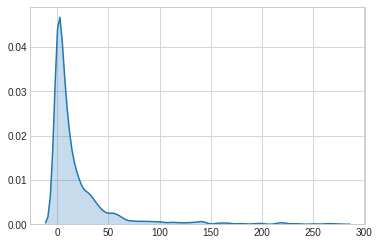

In [30]:
sns.kdeplot(v[:,5], shade = True) #Gráfica equivalente al histograma anterior.

/home/mimimustaine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


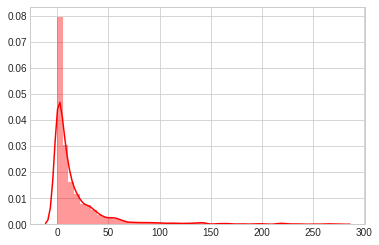

In [35]:
#Es posible ponerlas en la misma gráfica de la siguiente manera:
sns.distplot(np.array(v[:,5], dtype=np.float64), color = 'red');

In [41]:
Sea = {'Longitud' : np.array(v[:,0], dtype=np.float64), 'Latitud' : np.array(v[:,1], dtype=np.float64),
       'Precipitación': np.array(v[:,5], dtype=np.float64)}
Sea_df = pd.DataFrame(Sea)
Sea_df.head()

,Longitud,Latitud,Precipitación
0,-102.309722,21.895000,6.61
1,-102.466944,22.188611,10.60
2,-102.184167,21.738611,10.50
3,-102.712222,21.849167,18.17
4,-102.676944,21.997500,16.70


Para graficar una relación en <i>DataFrame,</i> automáticamente puede realizarse al utilizar el comando <i>sns.kdeplot()</i>. Observe que la ejecución muestra un error ya que el uso de arreglos 2D está en desuso.

/home/mimimustaine/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


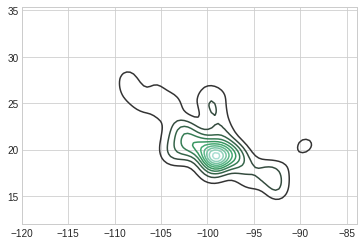

In [42]:
 sns.kdeplot(Sea_df)

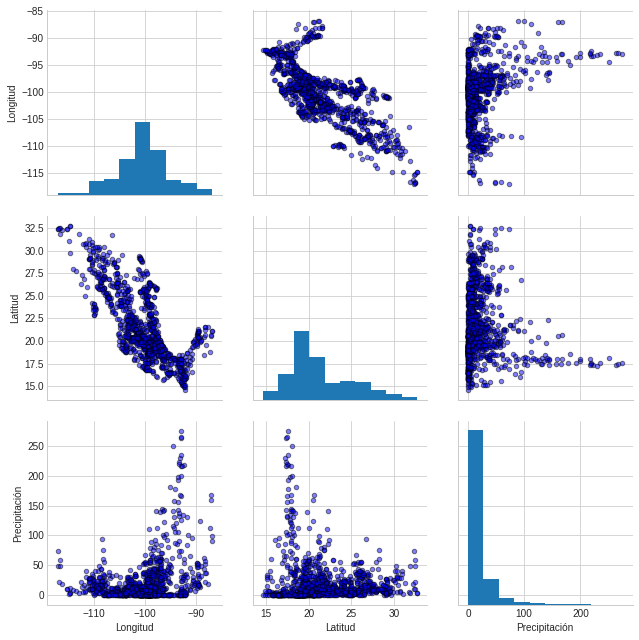

In [63]:
#Con este comando, se relacionan automáticamente las columnas que componen al DataFrame.
sns.pairplot(Sea_df, plot_kws = {'alpha': 0.5, 's': 20, 'color' : 'blue', 'edgecolor': 'k'}, size = 3);